In [1]:
import os
import pandas as pd
import numpy as np
#import scanpy as sc
#import pyranges as pr
import warnings

In [2]:
import scipy.stats as sts

In [3]:
#import palantir 
#import phenograph
#import harmony
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from tabulate import tabulate
from sklearn.decomposition import PCA

In [4]:
%matplotlib inline
# figure size & color
matplotlib.rcParams['figure.dpi'] = 100 # 150 dpi resolution
matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
matplotlib.rcParams['figure.figsize'] = [8, 8] # Square


# no bounding boxes or axis:
matplotlib.rcParams['axes.spines.bottom'] = "on"
matplotlib.rcParams['axes.spines.top'] = "off"
matplotlib.rcParams['axes.spines.left'] = "on"
matplotlib.rcParams['axes.spines.right'] = "off"
warnings.filterwarnings(action="ignore", module="matplotlib", message="findfont")

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [5]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 2 #set the value globally

In [50]:
fig_dir = '/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/Figures/'

In [63]:
#import
data_dir = os.path.expanduser('/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/DJ_Hs_PBMC_220523_79x79/')
probs = pd.read_csv(data_dir + 'K27_LSI_stats.csv')
#format
probs = pd.melt(probs, id_vars=['dims'])
probs

dims      variable     value
0       1      corr_500  0.883729
1       2      corr_500  0.259393
2       3      corr_500  0.092491
3       4      corr_500  0.086494
4       5      corr_500  0.065258
..    ...           ...       ...
400    41  provar_50000  0.006091
401    42  provar_50000  0.006077
402    43  provar_50000  0.006063
403    44  provar_50000  0.006038
404    45  provar_50000  0.006034

[405 rows x 3 columns]

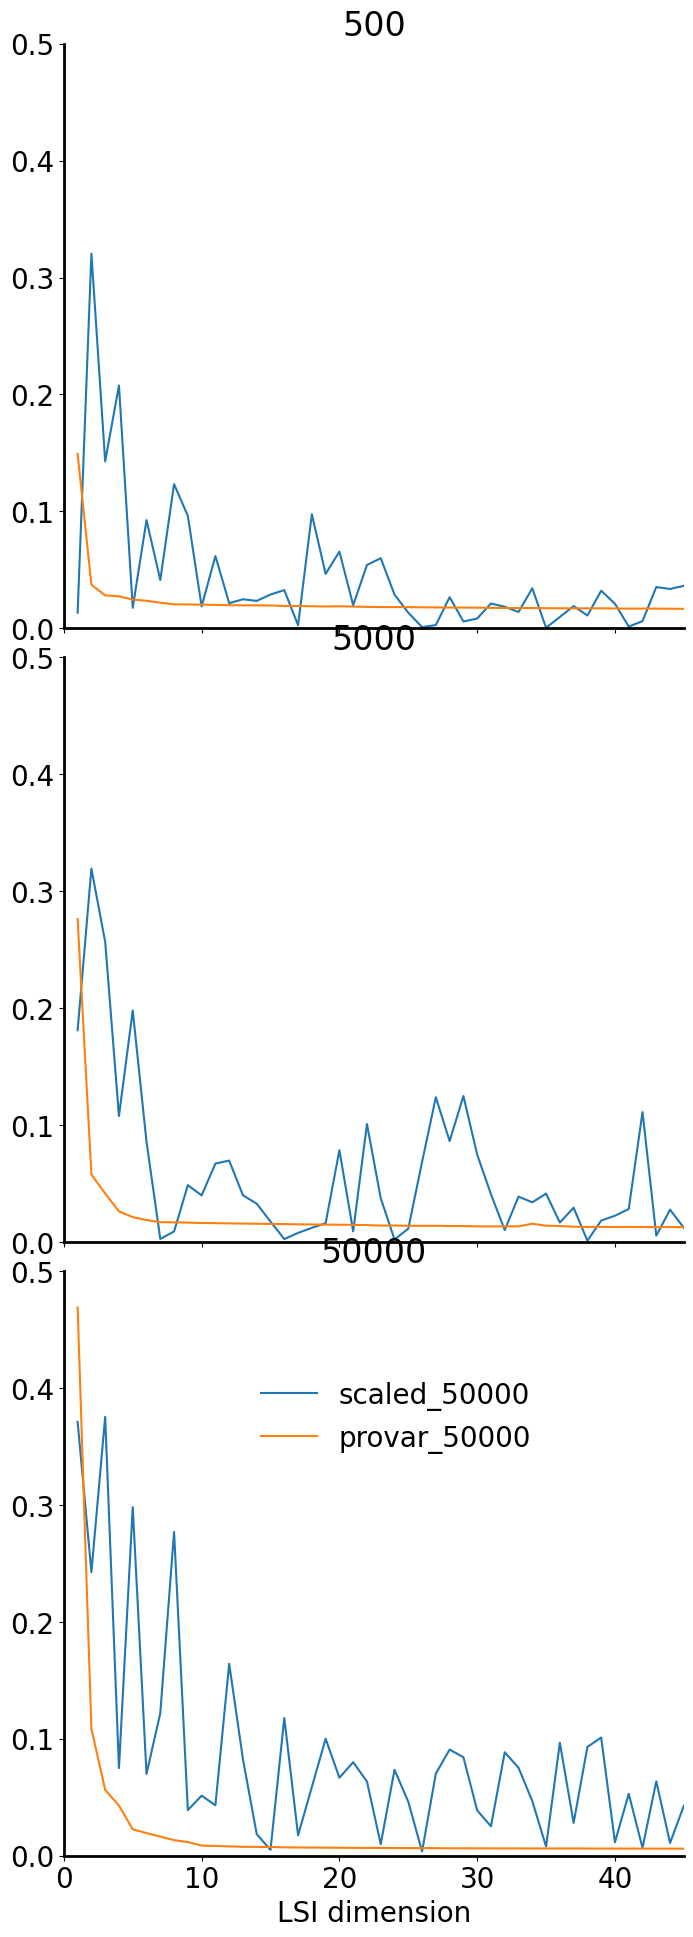

In [73]:
#coverage 
dfs = {'500':probs[probs['variable'].isin(['scaled_500', 'provar_500'])],
       '5000':probs[probs['variable'].isin(['scaled_5000', 'provar_5000'])],
       '50000':probs[probs['variable'].isin(['scaled_50000', 'provar_50000'])]
      }

# Create plot
fig, axs = plt.subplots(
    nrows=3,
    ncols=1, 
    figsize=(8,24),
    sharex=True,
    sharey=True
    # gridspec_kw={"width_ratios":[0.83,1,1]}
)
#scale data
#scalar = 0.001

#plots
for ax, (name, df) in zip(axs.reshape(-1), dfs.items()):

    g= sns.lineplot(data=df, 
                    x="dims", 
                    y="value",
                    ax=ax,
                    hue = 'variable'
                )
    g.set(
    # xscale='log',
    # yscale='log',
    title = name
    )
    
    g.set_xlabel('LSI dimension')
    g.set_ylabel('')
    
    ax.set(
        ylim=(0, 0.5),
        xlim=(0,45)
    )

sns.move_legend(
g, 
(0.3,0.67),
title = '',
frameon=False,
markerscale=3
)




for ax in axs.reshape(-1)[0:2]:
    ax.get_legend().remove()
    
plt.subplots_adjust(hspace=0.05)

# show plot
plt.savefig(
    fig_dir + '221224_LSI_stats_K27.pdf',
            transparent=True,
            bbox_inches='tight',
            #facecolor = 'black'
)
plt.show()

In [74]:
#import
data_dir = os.path.expanduser('/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/DJ_Hs_PBMC_220523_79x79/')
probs = pd.read_csv(data_dir + 'K4_LSI_stats.csv')
#format
probs = pd.melt(probs, id_vars=['dims'])
probs

dims      variable     value
0       1      corr_500  0.909385
1       2      corr_500  0.165363
2       3      corr_500  0.065623
3       4      corr_500  0.032671
4       5      corr_500  0.022977
..    ...           ...       ...
400    41  provar_50000  0.012451
401    42  provar_50000  0.012414
402    43  provar_50000  0.012395
403    44  provar_50000  0.012391
404    45  provar_50000  0.012389

[405 rows x 3 columns]

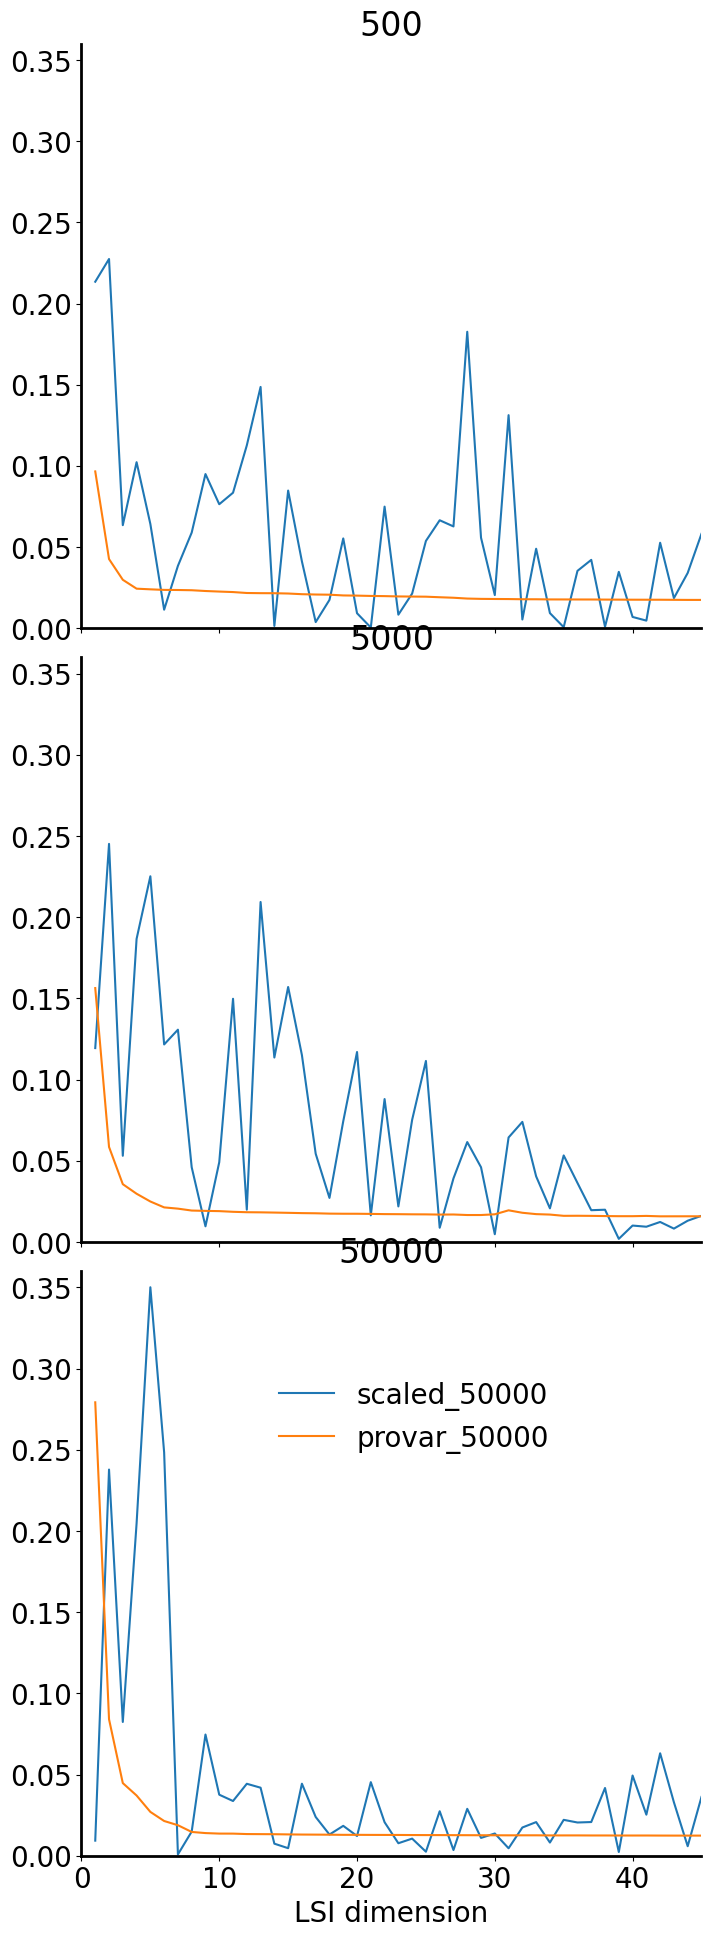

In [76]:
#coverage 
dfs = {'500':probs[probs['variable'].isin(['scaled_500', 'provar_500'])],
       '5000':probs[probs['variable'].isin(['scaled_5000', 'provar_5000'])],
       '50000':probs[probs['variable'].isin(['scaled_50000', 'provar_50000'])]
      }

# Create plot
fig, axs = plt.subplots(
    nrows=3,
    ncols=1, 
    figsize=(8,24),
    sharex=True,
    sharey=True
    # gridspec_kw={"width_ratios":[0.83,1,1]}
)
#scale data
#scalar = 0.001

#plots
for ax, (name, df) in zip(axs.reshape(-1), dfs.items()):

    g= sns.lineplot(data=df, 
                    x="dims", 
                    y="value",
                    ax=ax,
                    hue = 'variable'
                )
    g.set(
    # xscale='log',
    # yscale='log',
    title = name
    )
    
    g.set_xlabel('LSI dimension')
    g.set_ylabel('')
    
    ax.set(
        ylim=(0, 0.36),
        xlim=(0,45)
    )

sns.move_legend(
g, 
(0.3,0.67),
title = '',
frameon=False,
markerscale=3
)




for ax in axs.reshape(-1)[0:2]:
    ax.get_legend().remove()
    
plt.subplots_adjust(hspace=0.05)

# show plot
plt.savefig(
    fig_dir + '221224_LSI_stats_K4.pdf',
            transparent=True,
            bbox_inches='tight',
            #facecolor = 'black'
)
plt.show()